# CSCI 3202 Fall 2025

### Homework 2 (60 pts)
Due: Wednesday, September 10 at 11:59 pm

**Name: Abdullah Yassine**

---
**Use the graph shown below to answer the following questions.**

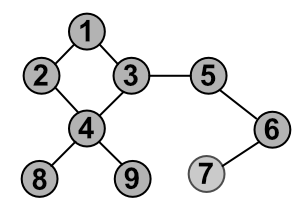

---
**Question 1. (10 points: 5 points each for BFS and DFS)**

By hand, use the BFS and recursive DFS algorithms showing the sequence of nodes BFS and recursive DFS will visit while starting at node 1 and with a goal of reaching node 7.  The traversal should visit each node in ascending order of the vertex numbers.  Divide the results up into steps, starting a new step when you remove a node from the queue or stack or when you return from a recursion function call. Show the frontier, explored (visited) nodes and actions taken for each step

BFS:

Let's start with adding number 1 to the frontier. Frontier = {1}, visited = {}

1. The loop begins, and we pop 1 from the frontier. 1 is not visited and 1 is not the goal, so we proceed to investigate its neighbors. We add 2 then 3 to the frontier. We also mark 1 as visited. Frontier = {2,3}, visited = {1}
2. For the next iteration, since it's queue, it follows the FIFO principle: the longest element waiting, the first that comes out. In this case, we pop 2 and we find that it's not visited and not the goal, so we investigate its neighbors. We add 4 to the frontier, but not one since it's visited. We mark 2 as visited. Frontier = {3,4}, visited = {1,2}.
3. For the third iteration, we pop 3. It's not visited and not the goal, so we investigate its neighbors. 1 is visited, so we don't enqueue (never enqueue the same element twice), and we enqueue 5. We mark 3 as visited. Frontier = {4,5}, visited = {1,2,3}.
4. For the next iteration, we pop from the queue and we have 4. It's not the goal so we investigate the neighbors: 2 and 3 are visited so we ignore them, but 8 and 9 aren't, so we enqueue them in that order. We mark 4 as visited. Frontier = {5,8,9}, visited = {1,2,3,4}.
5. For the next iteration, we pop 5 off the frontier, and it's not the goal so we investigate the neighbors. 3 is visited, so it's ignored. 6 isn't, so we add it to the queue. We mark 5 as visited. Frontier = {8,9,6}, visited = {1,2,3,4,5}.
6. For the next iteration, we pop 8 off, and it's not the goal. Its neighbor, 4, is visited. We mark 8 as visited. Frontier = {9,6}, visited = {1,2,3,4,5,8}.
7. For the next iteration, we pop 9 off, and it's not the goal. Its neighbor, 4, is visited. We mark 9 as visited. Frontier = {6}, visited = {1,2,3,4,5,8,9}.
8. For the next iteration, we pop 6 off, and we check its neighbors. 5 is visited, so it's ignored. We add 7 to the queue. We mark 6 as visited. Frontier = {7}, visited = {1,2,3,4,5,8,9,6}.
9. For the next iteration, we pop 7 off, and we know that this is the goal, so we return success. If you don't want to stop and simply just do this until you do the search for the entire graph, then we see that 7's neighbor, which is 6, is visited. We add 7 to the visited. Frontier = {}, visited = {1,2,3,4,5,8,9,6,7}. The queue is empty, so we stop the loop and the algorithm.

DFS (recursive):

We start with the source, in this case 1, and we mark it as visited. Thus, we check its neighbors:

1. We check 2, and we call the recursion function on it as the "source" or the node for the parameter.
2. We mark 2 as visited and we check its neighbors. 1 is visited, so it's ignored. 4 isn't, so we call the function on 4. Visited = {1,2}
3. We mark 4 as visited and we check its neighbors. 2 is visited so it's ignored. We call the function on 3. Visited = {1,2,4}.
4. We mark 3 as visited and check its neighbors. 1 and 4 are visited, so we ignore them. We call the function on 5. visited = {1,2,4,3}.
5. We mark 5 as visited and we check its neighbors. 3 is visited, so we ignore them. We call the function on 6. visited = {1,2,4,3,5}.
6. We mark 6 as visited and we check its neighbors. 5 is visited, so we ignore them. We call the function on 7. Visited = {1,2,4,3,5,6}.
7. We mark 7 as visited and we see that this is the goal. At this point, we can just return success and stop here. Otherwise, we check its neighbors and we see 6 is visited. We return from the function.
8. The next on stack is the call on 6. It does not have other neighbors, so we return.
9. The next on stack is the call on 5. It does not have other neighbors, so we return.
10. The next on stack is the call on 3. It does not have other neighbors, so we return.
11. The next on stack is the call on 4. It does not have other neighbors, so we return.
11. The next on stack is the call on 2. It does not have other neighbors, so we return.
11. The next on stack is the call on 1. It does not have other neighbors, so we return. At this point, there is no more calls on the stack, so the algorithm just finishes here.

---
**Question 2. (10 points)**

This homework uses the aima python github repository. You will need a python function from the aima-python folder.  Since we will be using the function in this repository quite a bit, it is probably easiest to clone it:

git clone https://github.com/aimacode/aima-python.git

Once you have the repository, you will need to copy the .py file(s) you need into the directory containing your homework, or copy the the homework notebook (not the folder containing the .ipynb file) into the aima-data directory.

For this assignment, you will need the file:


search.py
utils4e.py

Note: You should copy the file(s) from the repository, not move them. If you move the files, they won't be in the repository for your next assignment.

After you do this, if the import statement below fails, you will need to restart either the Jupyter server or your Python kernel. We are restarting to clear the cache for the import statement.

In [1]:
# Load the search functions into your notebook
import search
import utils4e

Using search.py from the AIMA repository and the abstract class Problem:

* Create a data structure that holds your graph from problem 1 and construct the graph. Print the data to show how it is stored
* Fill in the methods needed to search your graph, by subclassing class Problem and creating a concrete subclass. You will need to modify the actions, result and __init__ methods


In [2]:
from search import Problem
class GraphProblem(Problem):
    def __init__(self, initial, goal = None, graph : dict[str, list[str]] = None):
        super().__init__(initial, goal)
        self.graph = graph
    def actions(self, state : str):
        return self.graph[state]
    def result(self, state : str, action : str):
        if action in self.graph[state]:
            return action
        else:
            print(f"You cannot go from {state} to {action} directly; {state} isn't a neighbor of {action}.")
            return None

    


In [3]:
graph = {
    1: [2, 3],
    2: [1, 4],
    3: [1,4,5],
    4: [2,3,8,9],
    5: [3, 6],
    6: [5, 7],
    7 : [6],
    8 : [4],
    9 : [4]
}

problem = GraphProblem(initial='A', goal='F', graph=graph)

print("Graph structure:", problem.graph)
print("Actions from 1:", problem.actions(1))   # → ['B', 'C']
if (result := problem.result(1, 2)):
    print("Result of going from 1 to 2:", result)

Graph structure: {1: [2, 3], 2: [1, 4], 3: [1, 4, 5], 4: [2, 3, 8, 9], 5: [3, 6], 6: [5, 7], 7: [6], 8: [4], 9: [4]}
Actions from 1: [2, 3]
Result of going from 1 to 2: 2


---
**Question 3. (10 points: 5 points each for BFS and DFS)**

Modify and run the search.py functions depth_first_graph_search() (line 216) and breadth_first_graph_search() (line 238), printing the nodes each function visits on its way to finding the goal. Print a list of nodes in the order visited for the BFS function and the DFS function.


In [4]:
from collections import deque
problem = GraphProblem(initial=1, goal=7, graph=graph)

def breadth_first_graph_search(problem):
    visited = set()
    frontier = deque()
    
    frontier.append(problem.initial)
    counter = 1
    while frontier:
        popped = frontier.popleft()
        if popped not in problem.graph or popped in visited: # maybe you put an inital value that does not exist in the graph in the first place
            continue
        visited.add(popped)
        print(f"{counter}. Node visited: {popped}")
        
        for neighbor in problem.graph[popped]:
            if neighbor not in visited:
                frontier.append(neighbor)
        counter+=1
        
breadth_first_graph_search(problem)

def depth_first_graph_search(problem):
    stack = []
    visited = set()
    stack.append(problem.initial)
    visited.add(problem.initial)

    counter = 1
    while stack:
        popped = stack.pop()
        print(f"{counter}. Node visited: {popped}")
        for neighbor in reversed(problem.graph[popped]): # we should be popping in reverse order
            if neighbor not in visited:
                stack.append(neighbor)
                visited.add(neighbor)
        counter += 1




print("*********************************")
depth_first_graph_search(problem)
    

1. Node visited: 1
2. Node visited: 2
3. Node visited: 3
4. Node visited: 4
5. Node visited: 5
6. Node visited: 8
7. Node visited: 9
8. Node visited: 6
9. Node visited: 7
*********************************
1. Node visited: 1
2. Node visited: 2
3. Node visited: 4
4. Node visited: 8
5. Node visited: 9
6. Node visited: 3
7. Node visited: 5
8. Node visited: 6
9. Node visited: 7


---
**Question 4. (20 points, 10 points each for BFS and DFS)**

Modify these functions to return the optimal path from source to destination upon termination of a successful search.  The easiest way to do this is to start at the goal node then work backwards to the node that immediately preceeded it in the search.  Once you have this, find the node that preceeded it, etc.  Hint: A dictionary may prove useful here.

In [5]:
def breadth_first_graph_search(problem):
    visited = set()
    frontier = deque()
    origin = {}
    
    frontier.append(problem.initial)
    while frontier:
        popped = frontier.popleft()
        if popped not in problem.graph or popped in visited: 
            continue
        if popped == problem.goal:
            path_to_goal = []

            while popped is not None:
                path_to_goal.append(popped)
                popped = origin.get(popped, None)
            path_to_goal.reverse()
            return path_to_goal
        
        visited.add(popped)
        
        for neighbor in problem.graph[popped]:
            if neighbor not in visited:
                frontier.append(neighbor)
                origin[neighbor] = popped
    return []

problem = GraphProblem(initial=1, goal=7, graph=graph)
path = breadth_first_graph_search(problem)
print(f"The path to get from 1 to 7: {path}")


The path to get from 1 to 7: [1, 3, 5, 6, 7]


In [6]:
def depth_first_graph_search(problem):
    stack = []
    visited = set()
    stack.append(problem.initial)
    visited.add(problem.initial)

    origin = {}

    while stack:
        popped = stack.pop()
        if popped == problem.goal:
            path_to_goal = []
            while popped is not None:
                path_to_goal.append(popped)
                popped = origin.get(popped, None)
            path_to_goal.reverse()
            return path_to_goal
            
        for neighbor in reversed(problem.graph[popped]): # we should be popping in reverse order
            if neighbor not in visited:
                stack.append(neighbor)
                visited.add(neighbor)
                origin[neighbor] = popped

    return []

problem = GraphProblem(initial=1, goal=7, graph=graph)
path = depth_first_graph_search(problem)
print(f"The path to get from 1 to 7: {path}")

The path to get from 1 to 7: [1, 3, 5, 6, 7]


---
**Question 5. (10 points)**

Are the paths for BFS and DFS different? Write 2-3 sentences explaining why they are or are not different.

The path is exactly the same which is `[1, 3, 5, 6, 7]`. BFS guarantees the shortest path, while DFS may return a different path depending on the graph structure, and crucially, the order in which the neighbors were visited. Since the graph structure here is not complicated and forces both searches to follow the same chain of nodes to reach the goal, their returned paths match.